In [43]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [44]:

# Carregar o conjunto de dados
iris = load_iris()

# Converter para um DataFrame do Pandas (opcional)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Adicionar a coluna de classes


In [45]:
df # Iris setosa = 0, Iris versicolor = 1, Iris virginica = 2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
# 1. Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data  # Características (4 features)
y = iris.target  # Classes (0, 1, 2)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
# 3. Criar a rede neural
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),  # Camada oculta com 8 neurônios
    Dense(3, activation='softmax')  # Camada de saída com 3 neurônios (uma para cada classe)
])

# 4. Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# 5. Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9552 - loss: 0.0995 
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0728 
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9919 - loss: 0.0740 
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9701 - loss: 0.0965 
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9736 - loss: 0.0712 
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9650 - loss: 0.0853 
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9710 - loss: 0.0816 
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9547 - loss: 0.0998 
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9760 - loss: 0.0803
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9502 - loss: 0.1401 
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.1767 
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [50]:
# 6. Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

# 7. Fazer previsões (opcional)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print("Previsões:", predicted_classes)
print("Classes reais:", y_test)

Acurácia no conjunto de teste: 0.96
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002194EF21260> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Previsões: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 1 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Classes reais: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 

Acurácia no conjunto de teste: 0.96
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  2 11]]


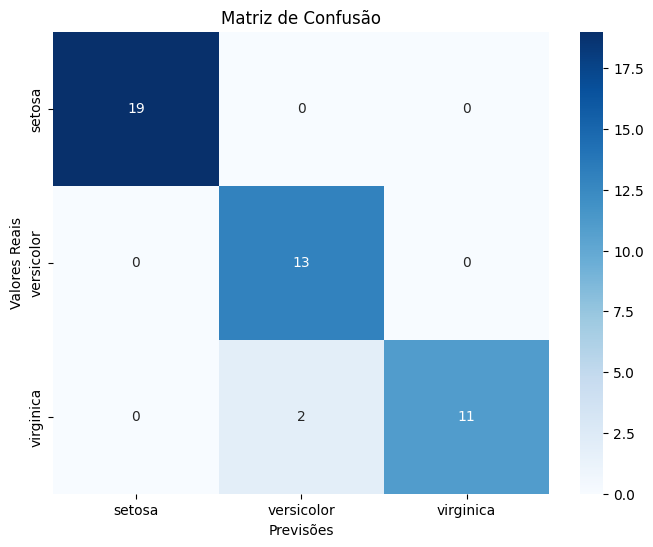

In [51]:
# 6. Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

# 7. Fazer previsões
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# 8. Matriz de confusão
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Matriz de Confusão:")
print(conf_matrix)

# 9. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

Epoch 1/50


c:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6901 - loss: 1.1119 - val_accuracy: 0.5833 - val_loss: 0.8061
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7615 - loss: 0.7253 - val_accuracy: 1.0000 - val_loss: 0.5212
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8489 - loss: 0.5599 - val_accuracy: 1.0000 - val_loss: 0.4611
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.4456 - val_accuracy: 1.0000 - val_loss: 0.4252
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9292 - loss: 0.4156 - val_accuracy: 1.0000 - val_loss: 0.3660
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.3337 - val_accuracy: 1.0000 - val_loss: 0.3398
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9625 - loss: 0.3159 - val_accuracy: 0.9583 - val_loss: 0.3529
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9716 - loss: 0.2997 - val_accuracy: 1.0000 - val_loss: 0.2753
Ep

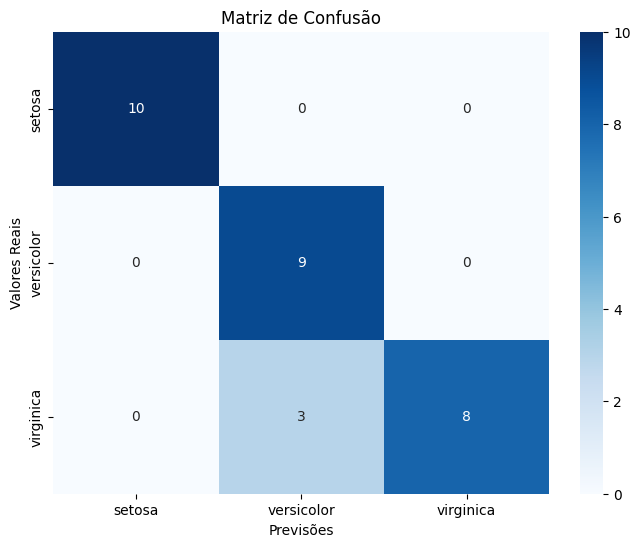

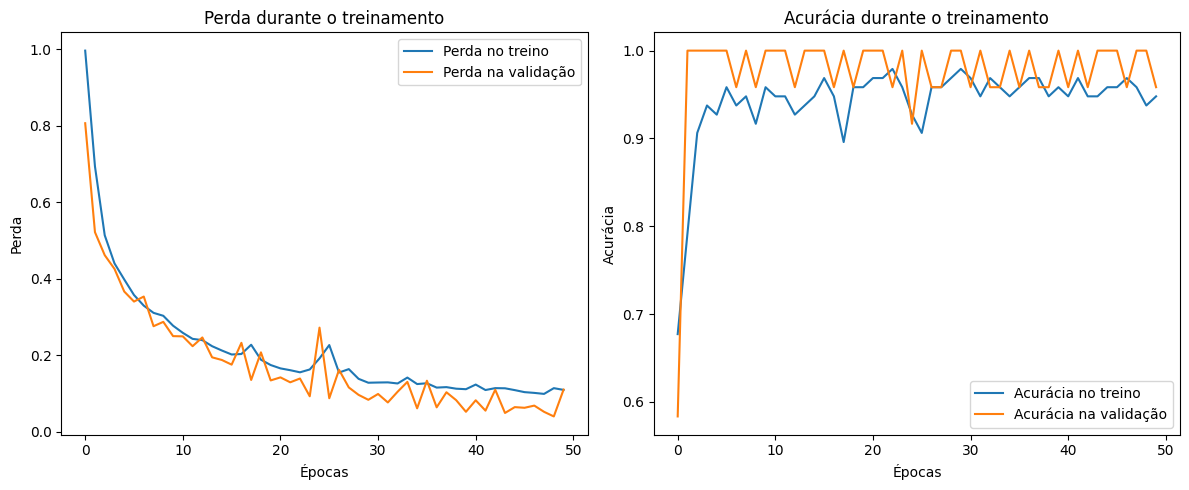

In [54]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data  # Características (4 features)
y = iris.target  # Classes (0, 1, 2)

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criar a rede neural
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),  # Camada oculta com 8 neurônios
    Dense(3, activation='softmax')  # Camada de saída com 3 neurônios (uma para cada classe)
])

# 4. Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# 6. Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

# 7. Fazer previsões
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# 8. Matriz de confusão
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Matriz de Confusão:")
print(conf_matrix)

# 9. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

# 10. Plotar a história de treinamento
plt.figure(figsize=(12, 5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda no treino')
plt.plot(history.history['val_loss'], label='Perda na validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico da acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia no treino')
plt.plot(history.history['val_accuracy'], label='Acurácia na validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()